<h1> Bour Equation </h1>

Bour equation (a.k.a sine-Gordon) takes the canonical form
\begin{equation}
u_{xt}-\frac{1}{\rho^2}\sin(u)=0,
\end{equation}
where $-1/\rho^2$ equals the Gaussian curvature $\kappa$.

The Crank-Nicolson scheme for this equation takes the form
\begin{equation}
u^{n+1}_{i+1} - u^{n+1}_{i-1}=u^{n}_{i+1} - u^{n}_{i-1} + \frac{2hk}{\rho^2}\sin(u^n_i),
\end{equation}
with $i=1,\ldots,m$ and $n=1,\ldots,N$, provided $m$ and $N$, grid points and time steps.

<h4> Essential Libraries </h4>

In [1]:
# ----------------------------------------/
%matplotlib inline
# ----------------------------------------/
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg as la

from pylab import *
from scipy import *
from ipywidgets import *
from scipy.sparse import spdiags
from numpy import asmatrix as MX

<h4> Basic Definitions</h4>

In [2]:
# space, time domain
a, b, t = -50, 50, 20

# grid points
m = 256

# curvature
r = 1.5

# spatial domain
x = np.linspace(a, b, m)

# mesh width
h = (b - a)/(1.0 + m)

# time steps
k = 0.001 * h
n = int(t / k)

# vectors solution with ghost boundaries
u = np.zeros(m + 2)
v = np.zeros((m + 2, n))

# triangular structure
o = np.ones(m)

# coefficients matrix
A = spdiags( [-1*o, 0*o, 1*o], [-1, 0, 1], m, m).toarray()

<h4> Initial Value </h4>

In [8]:
def f(x, alpha, beta, a, b):
    """
    initial guess or
    initial value condition
    
    kink
    4*np.arctan(np.exp(beta/r * x + alpha))
    
    breather
    4*np.arctan( (alpha*np.cos(b*x)) / (beta*np.cosh(a*x)) )
    """
    return 4*np.arctan( (alpha*np.cos(b*x)) / (beta*np.cosh(a*x)) )
# --------------------------------------------------/
def g(u):
    """
    RHS vector
    """
    return u[2:] - u[:-2] - (2*h*k/r**2)*np.sin(u[1:-1])

In [ ]:
# vectors solution with ghost boundaries
u = np.zeros(m + 4)
v = np.zeros((m + 4, n))
"""

f(x, alpha, beta, a, b)

NUMERICAL TESTS/EXPERIMENTS

alpha beta  a     b
-----------------------
10.0  1.05  0.85  0.125
10.0  1.05  0.75  0.010
 8.0  0.85  0.75  0.010
 1.0  0.50  0.85  0.200
 
"""
u[2:-2] = f(x - 5, 1, 0.5, 0.85, 0.2)

<h4> Algorithm </h4>

In [9]:
for j in range(n):
    v[:,j] = u
    u[1:-1] = dot(MX(A).I, g(u))

<h4> Plots </h4>

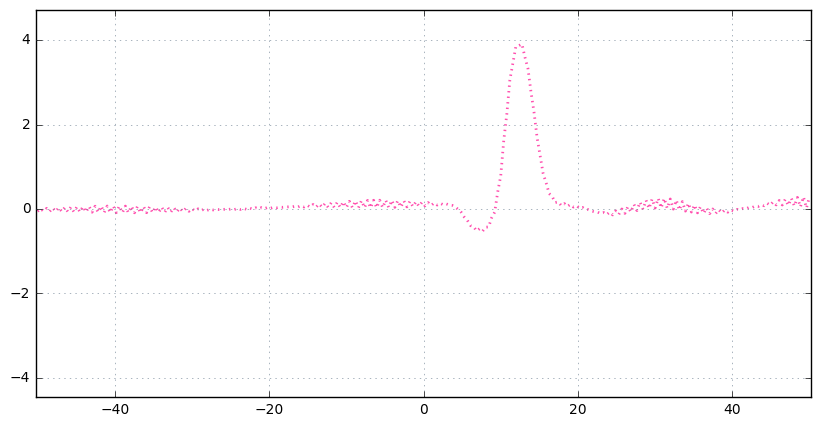

In [10]:
def evolution(step):
    l = 2e-1
    plt.figure(figsize=(10,5))
    plt.plot(x, v[1:-1,step], lw=2, alpha=0.75, color='deeppink', linestyle=':')
    plt.grid(color='lightslategray', alpha=0.90)
    plt.xlim(x.min() - l, x.max() + l)
    plt.ylim(v.min() - l, v.max() + l)
# --------------------------------------------------/
# interactive plot
step = widgets.IntSlider(min=0, max=n-1, description='step')
interact(evolution, step=step)

> NB property of [FVNTS](http://www.fvnts.ch/) 